In [68]:
import os
import glob
import numpy as np
from skimage import io
from skimage import color
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [52]:
def brenner_gradient(img: np.array) -> int:
        return np.sum((img[2:]-img[:-2])**2)

def calculate_2dft(input):
    ft = np.fft.fftshift(input)
    #ft = np.fft.fft2(ft)
    ft = np.fft.fftn(ft)
    return np.fft.ifftshift(ft)

def calculate_2dift(input):
    ift = np.fft.fftshift(input)
    #ift = np.fft.ifft2(ift)
    ift = np.fft.ifftn(ift)
    ift = np.fft.ifftshift(ift)
    return ift.real

# Patch Analysis

In [39]:
data_path = "/n/data2/hms/dbmi/kyu/lab/maf4031/focus_dataset/Inflammation_5"
sample_num = "10"
path = os.path.join(data_path, f"sample_{sample_num}")

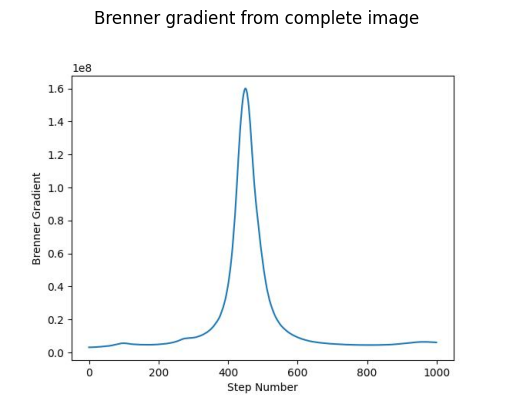

In [40]:
plt.imshow(io.imread(os.path.join(path, "brenner_gradient.jpg")))
plt.title("Brenner gradient from complete image")
plt.axis("off")
plt.show()

### Brenner gradient

In [41]:
# select patches from image
patch_size = (360, 256)
img = io.imread(os.path.join(path, "distance0.jpg"))
h, w, _ = img.shape
x_steps = int(h / patch_size[0])
y_steps = int(w / patch_size[1])
x_coord = np.linspace(int(patch_size[0]/2), h - int(patch_size[0]/2), x_steps)
y_coord = np.linspace(int(patch_size[1]/2), w - int(patch_size[1]/2), y_steps)
patch_coord = [(x, y) for x in x_coord for y in y_coord]

img_paths = glob.glob(f"{path}/distance*")
sorted_img_path = sorted(img_paths, key=lambda x: int(x.split("distance")[-1].split(".")[0]))
patch_list = [[] for p in range(len(patch_coord))]
for img_path in sorted_img_path:
    img = io.imread(img_path)
    for idx, (x, y) in enumerate(patch_coord):
        patch = img[int(x-int(patch_size[0]/2)):int(x+int(patch_size[0]/2)), int(y-int(patch_size[1]/2)):int(y+int(patch_size[1]/2))]
        brenner_value = brenner_gradient(patch)
        patch_list[idx].append(brenner_value)

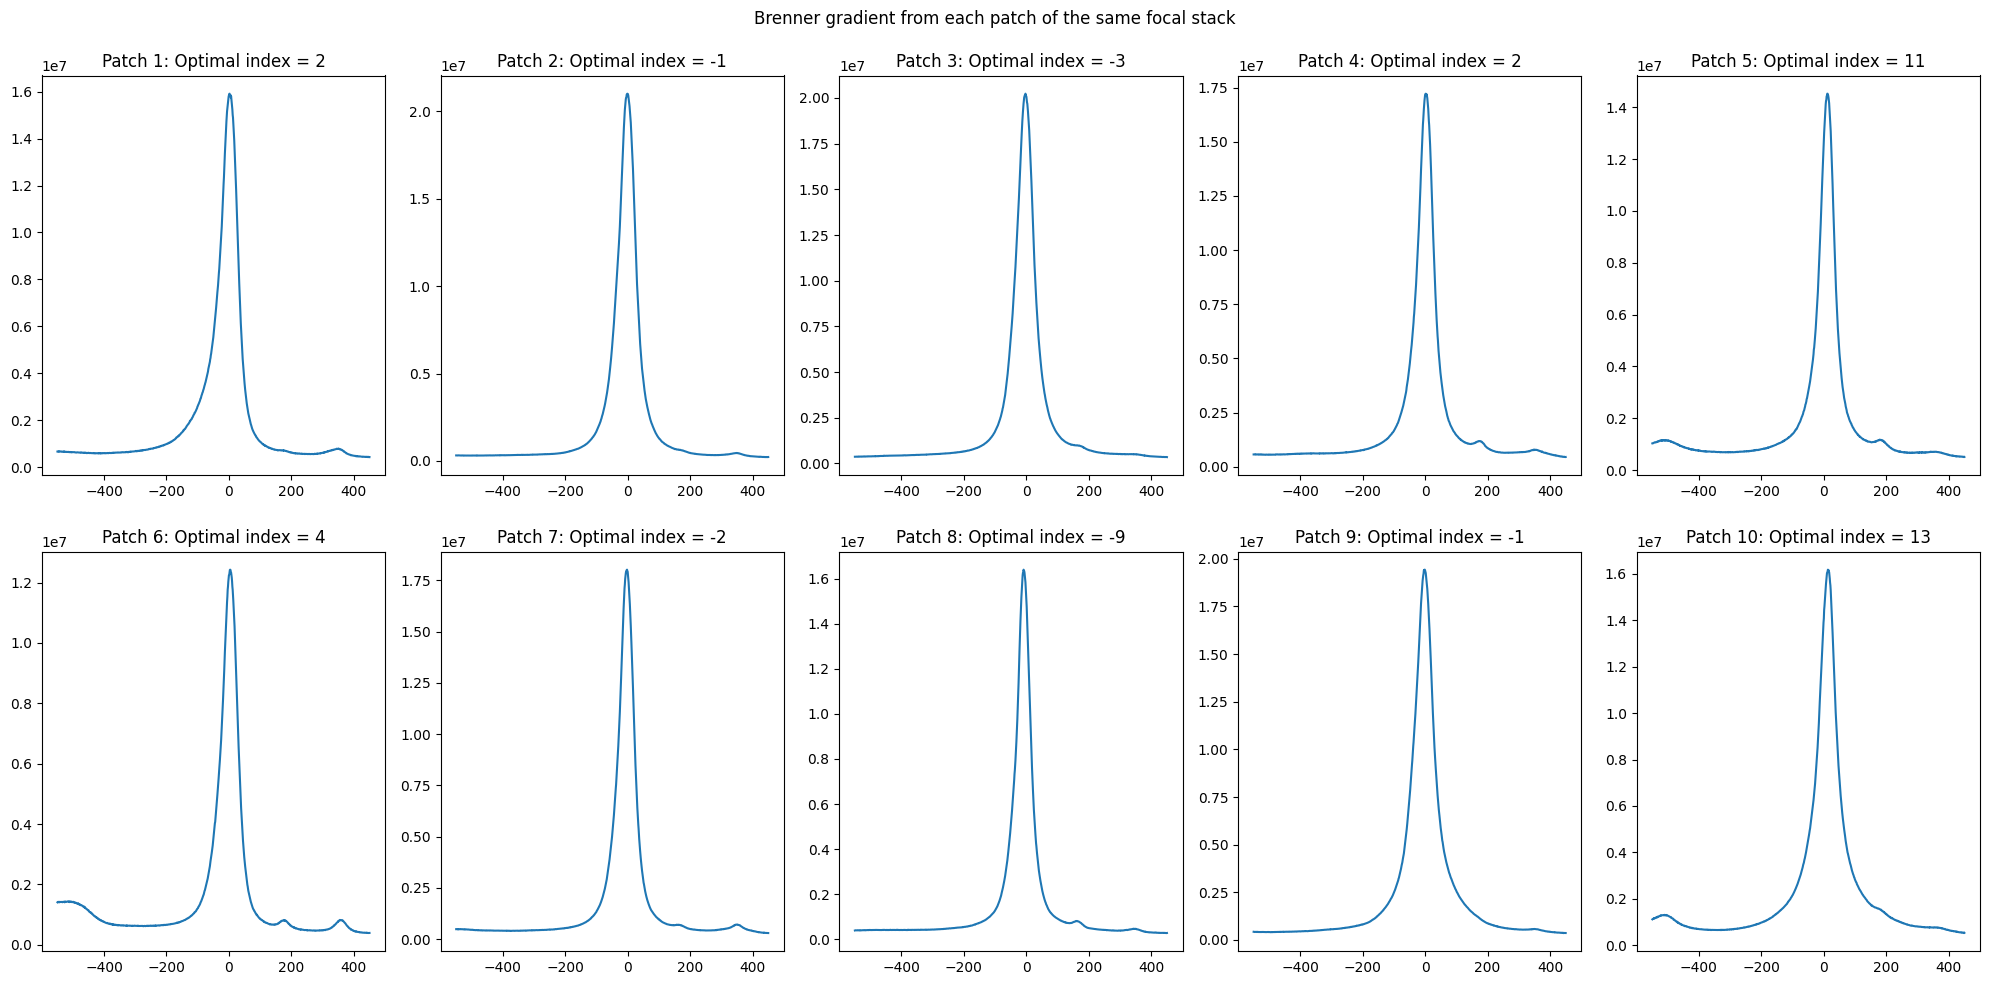

In [50]:
index_range = [int(img.split("distance")[-1].split(".")[0]) for img in sorted_img_path]
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for i in range(10):
    optimal_index = sorted_img_path[np.argmax(patch_list[i])].split("distance")[-1].split(".")[0]
    if i < 5:
        ax[0][i].plot(index_range, patch_list[i])
        ax[0][i].set_title(f"Patch {i+1}: Optimal index = {optimal_index}")
    else:
        ax[1][i-5].plot(index_range, patch_list[i])
        ax[1][i-5].set_title(f"Patch {i+1}: Optimal index = {optimal_index}")
fig.suptitle("Brenner gradient from each patch of the same focal stack")
plt.tight_layout()
plt.show()

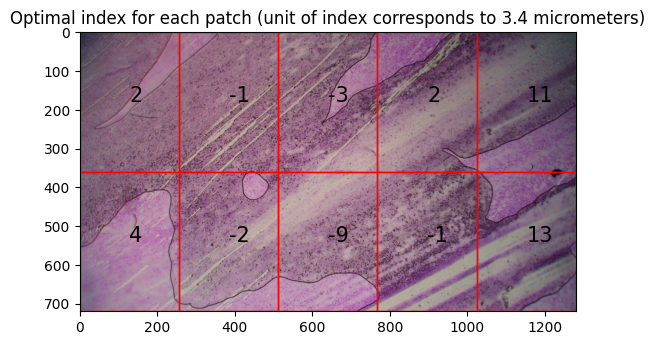

In [ ]:
fig, ax = plt.subplots(1)
img = io.imread(os.path.join(path, "distance-9.jpg"))
ax.imshow(img)
for idx, (x, y) in enumerate(patch_coord):
    rect = patches.Rectangle((y-int(patch_size[1]/2), x-int(patch_size[0]/2)), patch_size[1], patch_size[0], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    optimal_index = sorted_img_path[np.argmax(patch_list[idx])].split("distance")[-1].split(".")[0]
    ax.text(y, x, optimal_index, color='black', fontsize=15)
plt.title("Optimal index for each patch (unit of index corresponds to 3.4 micrometers)")
plt.show()

### FFT

In [74]:
img = io.imread(os.path.join(path, "distance0.jpg"))
img = color.rgb2gray(img)
x, y = patch_coord[0]
patch = img[int(x-int(patch_size[0]/2)):int(x+int(patch_size[0]/2)), int(y-int(patch_size[1]/2)):int(y+int(patch_size[1]/2))]

fft_patch = calculate_2dft(patch)
power_spectrum_patch = np.log(abs(fft_patch))

(720, 1280)


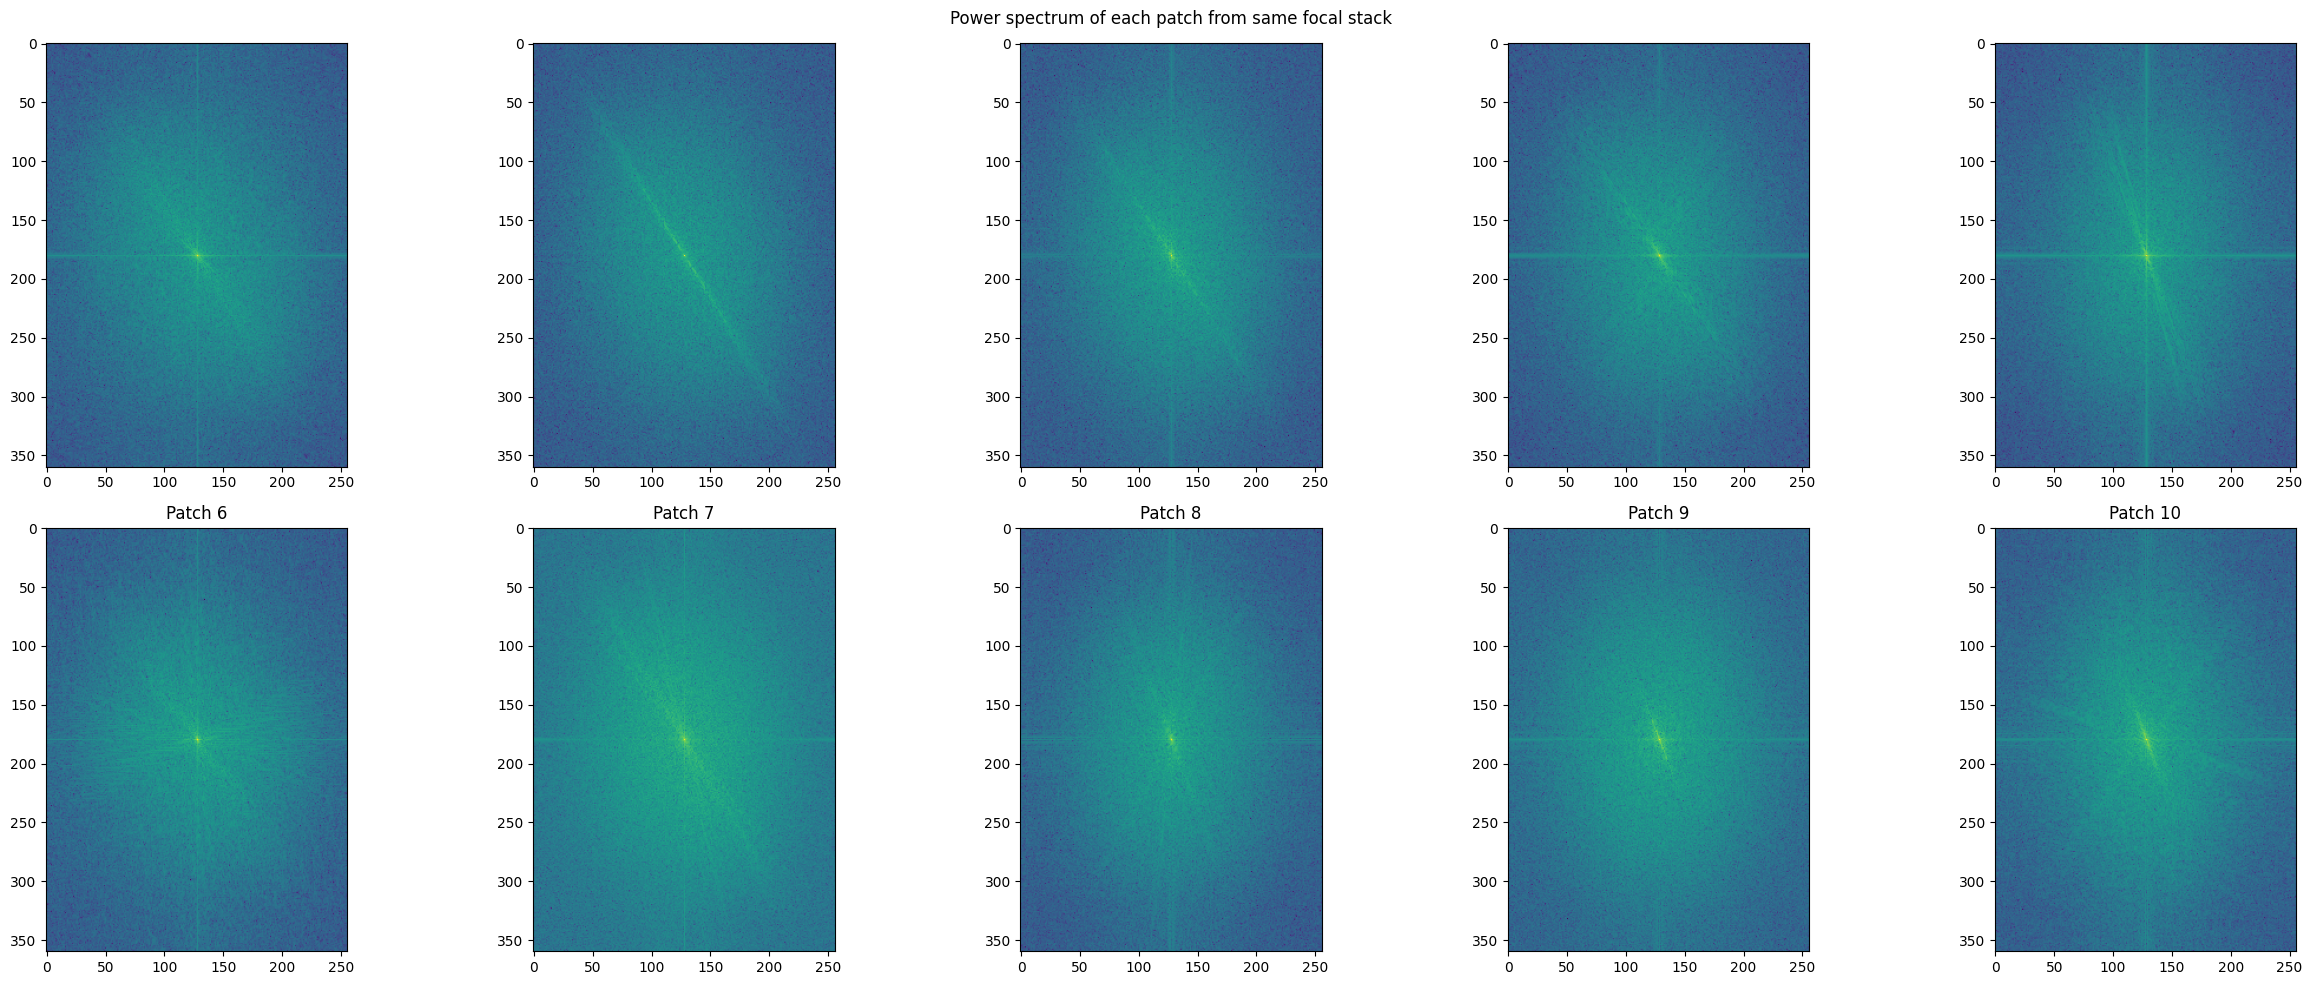

In [80]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

patch_size = (360, 256)
img = io.imread(os.path.join(path, "distance0.jpg"))
img = color.rgb2gray(img)
for i, (x, y) in enumerate(patch_coord):
    patch = img[int(x-int(patch_size[0]/2)):int(x+int(patch_size[0]/2)), int(y-int(patch_size[1]/2)):int(y+int(patch_size[1]/2))]
    fft_patch = calculate_2dft(patch)
    power_spectrum_patch = np.log(np.abs(fft_patch))
    if i < 5:
        ax[0][i].imshow(power_spectrum_patch)
        ax[1][i].set_title(f"Patch {i+1}")
    else:
        ax[1][i-5].imshow(power_spectrum_patch)
        ax[1][i-5].set_title(f"Patch {i+1}")
fig.suptitle("Power spectrum of each patch from same focal stack")
plt.tight_layout()
plt.show()
